In [7]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import scipy
from matplotlib.colors import LogNorm
import pandas as pd
import seaborn as sns
%matplotlib inline
# sys.path.insert(1, "/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/SourceSearch")
# import deDisperse_util as util
import matplotlib.colors as colors
from matplotlib.pyplot import cm


# my_path_plots = os.path.abspath("./plots/")

In [8]:
import warnings
warnings.filterwarnings("ignore")
mpl.rcParams['text.usetex'] = True
mpl.rcParams['mathtext.rm'] = 'Times New Roman'
mpl.rcParams['mathtext.it'] = 'Times New Roman:italic'
mpl.rcParams['mathtext.bf'] = 'Times New Roman:bold'
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] #for \text command

mpl.rc('font', family='serif', size=12)
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = 18
mpl.rcParams['xtick.major.size'] = 7
mpl.rcParams['ytick.major.size'] = 7

mpl.rcParams['axes.titlesize'] = 20
mpl.rcParams['axes.labelsize'] = 20
# mpl.rc('font', size=16)
mpl.rc('axes', titlesize=20)

current_palette = sns.color_palette('colorblind', 10)


In [9]:
data_2NuBB = pd.read_csv("./data/2NuBB.csv")
data_2NuBB.head()

,norm_energy,spectrum
0,0.0082,0.099
1,0.0170,0.140
2,0.0240,0.180
3,0.0300,0.220
4,0.0360,0.260


In [10]:
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)
from scipy.interpolate import make_interp_spline


In [11]:
x = np.linspace(0,6,6000)
def f(K,T0):
    return (K*(T0-K)**5)*(1+2*K+(4/3)*K**2+(1/3)*K**3+(1/30)*K**4)#Primakoffand Rosen: H. Primakoff and S. P. ROSEN, Phys. Rev. 184, 1925 (1969)
T0=(2600)/511
I = scipy.integrate.quad(f, 0, 3, args=(T0))

y = f(x,T0)/I[0]
x2 = np.linspace(0.95,1.05,600)

In [12]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

## Step 1

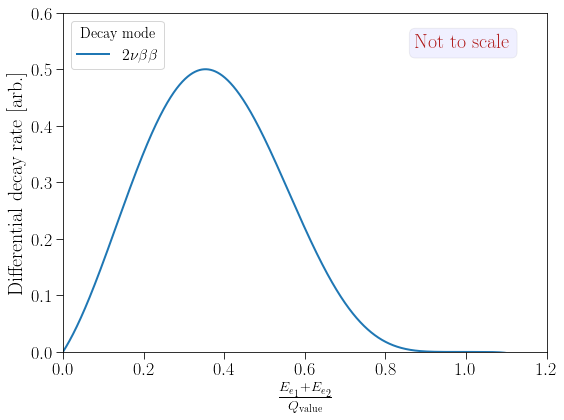

In [63]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
axes.plot(x/T0,y, ls = "-", label = r"$2\nu\beta\beta$", lw = 2)
# axes.plot(x2, gaussian(x2,1,0.01)/50, label = r"$0\nu\beta\beta$", lw = 2)
axes.set_ylim(0,0.6)
axes.set_xlim(0,1.2)
axes.set_xlabel(r"$\frac{E_{e_1}+E_{e_2}}{Q_{\text{value}}}$")
axes.set_ylabel("Differential decay rate [arb.]")
legend = plt.legend(loc = "upper left", fontsize = 16, title="Decay mode", fancybox=True)
plt.setp(legend.get_title(),fontsize='large')

plt.annotate("Not to scale", xy=(0.8, 0.52),xytext=(30,10), textcoords="offset points",weight='bold', color = "firebrick", fontsize = 20,
            bbox=dict(boxstyle="round", fc="b", alpha = 0.06))
plt.tight_layout()
plt.savefig("0NuBBdecay_spectrum_1.pdf")

## Step 2

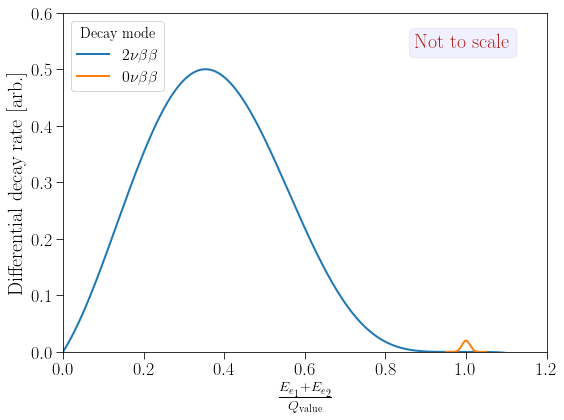

In [64]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
axes.plot(x/T0,y, ls = "-", label = r"$2\nu\beta\beta$", lw = 2)
axes.plot(x2, gaussian(x2,1,0.01)/50, label = r"$0\nu\beta\beta$", lw = 2)
axes.set_ylim(0,0.6)
axes.set_xlim(0,1.2)
axes.set_xlabel(r"$\frac{E_{e_1}+E_{e_2}}{Q_{\text{value}}}$")
axes.set_ylabel("Differential decay rate [arb.]")
legend = plt.legend(loc = "upper left", fontsize = 16, title="Decay mode", fancybox=True)
plt.setp(legend.get_title(),fontsize='large', )

plt.annotate("Not to scale", xy=(0.8, 0.52),xytext=(30,10), textcoords="offset points",weight='bold', color = "firebrick", fontsize = 20,
            bbox=dict(boxstyle="round", fc="b", alpha = 0.06))
plt.tight_layout()
plt.savefig("0NuBBdecay_spectrum_2.pdf")

## Step 3

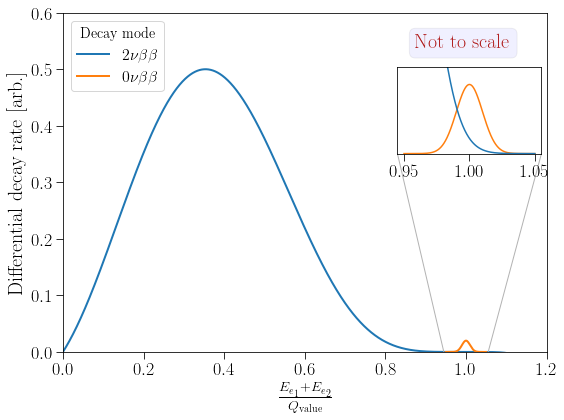

In [65]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
axes.plot(x/T0,y, ls = "-", label = r"$2\nu\beta\beta$", lw = 2)
axes.plot(x2, gaussian(x2,1,0.01)/50, label = r"$0\nu\beta\beta$", lw = 2)
axes.set_ylim(0,0.6)
axes.set_xlim(0,1.2)
axes.set_xlabel(r"$\frac{E_{e_1}+E_{e_2}}{Q_{\text{value}}}$")
axes.set_ylabel("Differential decay rate [arb.]")
legend = plt.legend(loc = "upper left", fontsize = 16, title="Decay mode", fancybox=True)
plt.setp(legend.get_title(),fontsize='large', )
plt.annotate("Not to scale", xy=(0.8, 0.52),xytext=(30,10), textcoords="offset points",weight='bold', color = "firebrick", fontsize = 20,
            bbox=dict(boxstyle="round", fc="b", alpha = 0.06))
left, bottom, width, height = [0.7, 0.63, 0.25, 0.2]
ins1 = fig.add_axes([left, bottom, width, height])
# ins2 = fig.add_axes([left, bottom, width, height])
# ins2.set_xticks([])
ins1.set_yticks([])
ip = InsetPosition(axes, [left, bottom, width, height])

ins1.plot(x2, gaussian(x2,1,0.01)/5E3, c="C1");
ins1.plot(x2, gaussian(x2,0.95,0.02)/1E3);
ins1.set_ylim(0,0.00025);
# ins1.set_title("Not to scale")
# ins2.plot(x2, gaussian(x2,1,0.01)/1E5, c="C1");


# ax3 = fig.add_axes([left, bottom, width, height])
# ax3.plot(x/T0,y, ls = "--") 
# ax3.set_xlim([-1,5])
# ax3.set_ylim([-1,5])
# ax3.set_axes_locator(ip)

mark_inset(axes, ins1, loc1=3, loc2=4, fc="none", ec='0.7')
plt.tight_layout()
plt.savefig("0NuBBdecay_spectrum_3.pdf")

## Step 4

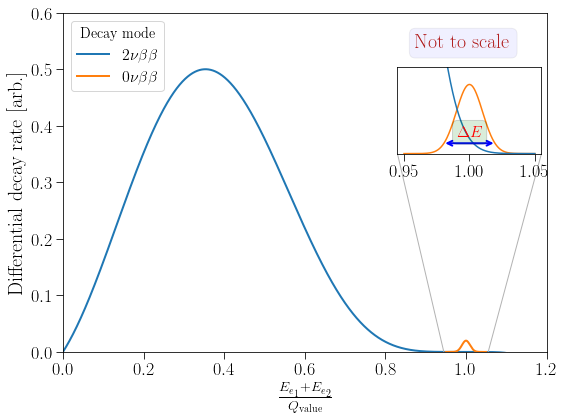

In [149]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
axes.plot(x/T0,y, ls = "-", label = r"$2\nu\beta\beta$", lw = 2)
axes.plot(x2, gaussian(x2,1,0.01)/50, label = r"$0\nu\beta\beta$", lw = 2)
axes.set_ylim(0,0.6)
axes.set_xlim(0,1.2)
axes.set_xlabel(r"$\frac{E_{e_1}+E_{e_2}}{Q_{\text{value}}}$")
axes.set_ylabel("Differential decay rate [arb.]")
legend = plt.legend(loc = "upper left", fontsize = 16, title="Decay mode", fancybox=True)
plt.setp(legend.get_title(),fontsize='large', )
plt.annotate("Not to scale", xy=(0.8, 0.52),xytext=(30,10), textcoords="offset points",weight='bold', color = "firebrick", fontsize = 20,
            bbox=dict(boxstyle="round", fc="b", alpha = 0.06))
left, bottom, width, height = [0.7, 0.63, 0.25, 0.2]
ins1 = fig.add_axes([left, bottom, width, height])
# ins2 = fig.add_axes([left, bottom, width, height])
# ins2.set_xticks([])
ins1.set_yticks([])
ip = InsetPosition(axes, [left, bottom, width, height])

ins1.plot(x2, gaussian(x2,1,0.01)/5E3, c="C1");
ins1.plot(x2, gaussian(x2,0.95,0.02)/1E3);
ins1.set_ylim(0,0.00025);
ins1.annotate(s='', xy=(1.02,0.00003), xytext=(0.98,0.00003), arrowprops=dict(color='blue', lw=2,arrowstyle='<->'))
ins1.annotate("$\Delta E$",xy=(0.99,0.00005), textcoords="offset points",fontsize = 16,
            bbox=dict(boxstyle="round", fc="g", alpha = 0.15), c = "r")
# ins1.set_title("Not to scale")
# ins2.plot(x2, gaussian(x2,1,0.01)/1E5, c="C1");


# ax3 = fig.add_axes([left, bottom, width, height])
# ax3.plot(x/T0,y, ls = "--") 
# ax3.set_xlim([-1,5])
# ax3.set_ylim([-1,5])
# ax3.set_axes_locator(ip)

mark_inset(axes, ins1, loc1=3, loc2=4, fc="none", ec='0.7')
plt.tight_layout()
plt.savefig("0NuBBdecay_spectrum_4.pdf")

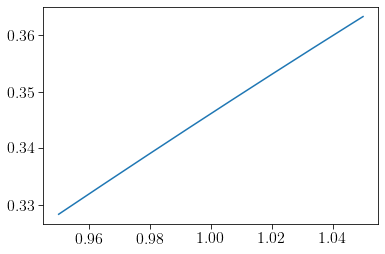

In [87]:
plt.plot(x2,f(x2,T0)/I[0])
